### Exercise 1

<div class="alert-success">
    
1. **Use two maps of points.**

2. **Compute the distance matrix for both maps.**

3. **Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.**
</div>

In [209]:
#SOLO ES UNA GRAFICA UNA MATRIZ Y NADA MAS
#sellecionar lo que ncesitan hacer
#esa es la distancia de punto a punto 

In [210]:
from  fiona import listlayers
import os

argentinaMaps=os.path.join('maps','argentina22171','argentinaMaps22171_all3.gpkg')

#layers in maps
listlayers(argentinaMaps)

['country',
 'cities',
 'rivers',
 'states',
 'municipalities',
 'border',
 'airports']

In [211]:
# reading in the data:
import os
import geopandas as gpd

states=gpd.read_file(argentinaMaps,layer='states')
municipalities=gpd.read_file(argentinaMaps,layer='municipalities')
airports=gpd.read_file(argentinaMaps,layer='airports')
rivers=gpd.read_file(argentinaMaps,layer='rivers')
border=gpd.read_file(argentinaMaps,layer='border')

In [212]:
airports

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Malvinas Argentinas Airport,medium_airport,-54.843300,-68.295800,102.0,Tierra del Fuego Province,Ushuaia,POINT (1737945.839 3915824.327)
1,El Calafate - Commander Armando Tola Internati...,medium_airport,-50.280300,-72.053101,669.0,Santa Cruz Province,El Calafate,POINT (1496258.115 4429856.907)
2,Cataratas Del Iguazú International Airport,medium_airport,-25.737301,-54.473400,916.0,Misiones Province,Puerto Iguazu,POINT (3275864.379 7033639.587)
3,El Plumerillo Airport,medium_airport,-32.831699,-68.792900,2310.0,Mendoza Province,Mendoza,POINT (1800378.820 6363192.739)
4,San Carlos De Bariloche Airport,medium_airport,-41.151199,-71.157501,2774.0,Río Negro Province,San Carlos de Bariloche,POINT (1570761.950 5444147.406)
...,...,...,...,...,...,...,...,...
934,Agrodistribuidora Airstrip,closed,-29.220089,-61.760298,220.0,Santa Fe Province,Tostado,POINT (2498425.338 6724316.309)
935,Dayry Partners Americas Manufacturing Argentin...,heliport,-32.440000,-63.228900,639.0,Córdoba Province,Villa Nueva,POINT (2326214.300 6377105.494)
936,Villa Unión Airport,closed,-29.422180,-62.789526,248.0,Santiago del Estero Province,Villa Unión,POINT (2395804.550 6710202.541)
937,Roca Heliport,heliport,-32.060000,-64.779400,3444.0,Córdoba Province,Yacanto de Calamuchita,POINT (2182663.874 6430422.072)


In [213]:
airports['type'].value_counts()

type
small_airport     685
heliport          144
medium_airport     68
closed             41
balloonport         1
Name: count, dtype: int64

In [214]:
medium_airport=airports[airports['type']=='medium_airport'] #can't use "airports.type"
medium_airport.reset_index(drop=True, inplace=True)
medium_airport

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Malvinas Argentinas Airport,medium_airport,-54.843300,-68.295800,102.0,Tierra del Fuego Province,Ushuaia,POINT (1737945.839 3915824.327)
1,El Calafate - Commander Armando Tola Internati...,medium_airport,-50.280300,-72.053101,669.0,Santa Cruz Province,El Calafate,POINT (1496258.115 4429856.907)
2,Cataratas Del Iguazú International Airport,medium_airport,-25.737301,-54.473400,916.0,Misiones Province,Puerto Iguazu,POINT (3275864.379 7033639.587)
3,El Plumerillo Airport,medium_airport,-32.831699,-68.792900,2310.0,Mendoza Province,Mendoza,POINT (1800378.820 6363192.739)
4,San Carlos De Bariloche Airport,medium_airport,-41.151199,-71.157501,2774.0,Río Negro Province,San Carlos de Bariloche,POINT (1570761.950 5444147.406)
...,...,...,...,...,...,...,...,...
63,Orán Airport,medium_airport,-23.152800,-64.329201,1171.0,Salta Province,Orán,POINT (2287195.989 7419561.720)
64,Rincon De Los Sauces Airport,medium_airport,-37.390598,-68.904198,1968.0,Neuquén Province,Rincon de los Sauces,POINT (1774214.302 5857484.503)
65,Tres Arroyos Airport,medium_airport,-38.386900,-60.329700,400.0,Buenos Aires Province,Tres Arroyos,POINT (2521222.679 5686315.521)
66,Villa Dolores Airport,medium_airport,-31.945200,-65.146301,1847.0,Córdoba Province,Villa Dolores,POINT (2148716.857 6445469.683)


In [215]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3824 non-null   object 
 1   Country Code  3824 non-null   object 
 2   Latitude      3824 non-null   float64
 3   Longitude     3824 non-null   float64
dtypes: float64(2), object(2)
memory usage: 119.6+ KB


In [216]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Management System',
 'Good Ho

In [217]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3824 non-null   object 
 1   Country Code  3824 non-null   object 
 2   Latitude      3824 non-null   float64
 3   Longitude     3824 non-null   float64
dtypes: float64(2), object(2)
memory usage: 119.6+ KB


In [218]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [219]:
#primero creo los puntos espaciales no proyectados
#1.spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

#2. subset: SUBSETTT me quedo con Brasil
seaports_arg=seaports[seaports['Country Code']=='Argentina'].copy()

#3. reset indexes
seaports_arg.reset_index(drop=True, inplace=True)

#4. reprojecting
seaports_arg_22171=seaports_arg.to_crs(22171) # projected crs

In [220]:
# subsetting
#largeAirports=airports[airports['type']=='large_airport'] #can't use "airports.type"
#largeAirports.reset_index(drop=True, inplace=True)
#largeAirports
#ahora voy a graficar los aeropuertos y los puertos
#plotting


<Axes: >

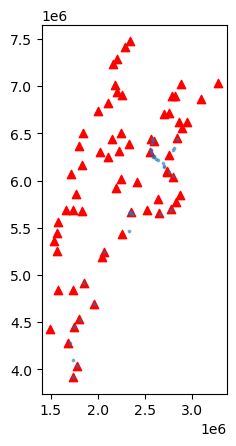

In [221]:
base=medium_airport.plot(color='red',marker="^")
seaports_arg_22171.plot(ax=base,alpha=0.5,markersize=3)

In [222]:
#try 1: default
#seaports_arg_22171.geometry.apply\
#(lambda g: largeAirports.geometry.distance(g)/1000)
#a la COLUMNA GEOMETRIA de los aeropuertos va a calularlo con todos y loova dividir entre 1000 y salir la matriz de distancias
#claro el [0] con [0] es 376

In [223]:
# try 2: see names (change indexes) ya no aparecen los indices sino los nombres de los puertos

#seaports_arg_22171.set_index('portName').geometry.apply\
#(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

In [224]:
#try 3: reorder previous output ordenar alfabeticamente

distanceMatrixKM_sea_air=seaports_arg_22171.set_index('portName').geometry.apply\
(lambda g: medium_airport.set_index('name').geometry.distance(g)/1000)


distanceMatrixKM_sea_air

name,Malvinas Argentinas Airport,El Calafate - Commander Armando Tola International Airport,Cataratas Del Iguazú International Airport,El Plumerillo Airport,San Carlos De Bariloche Airport,Martin Miguel De Guemes International Airport,San Fernando Airport,Ingeniero Ambrosio Taravella Airport,Piloto Civil N. Fernández Airport,Rosario Islas Malvinas International Airport,...,Curuzu Cuatia Airport,El Bolson Airport,General Pico Airport,Comodoro D.R. Salomón Airport,Monte Caseros Airport,Orán Airport,Rincon De Los Sauces Airport,Tres Arroyos Airport,Villa Dolores Airport,Zapala Airport
portName,,,,,,,,,,,,,,,,,,,,,
Puerto Madryn,1366.768528,994.191258,2159.831180,1153.656826,539.074816,1996.345374,1090.575006,1278.736970,1036.717924,1165.981732,...,1592.868937,543.767358,796.764722,899.199716,1554.131852,2188.770081,683.403330,633.337147,1206.456824,601.311910
Mar Del Plata,2054.612633,1794.438217,1434.074102,1182.779176,1227.473518,1662.895179,416.265822,975.066140,1781.893607,651.609269,...,937.050878,1278.844060,620.297651,1119.307581,879.768704,1796.055276,1012.894985,252.067037,979.788762,1109.760669
La Plata,2385.171695,2079.731537,1091.321939,1042.467234,1368.259372,1342.802056,78.723602,716.224035,2093.239853,349.103570,...,573.640871,1437.366160,550.142140,1075.771914,517.527051,1457.602267,1040.240485,458.557642,756.508828,1190.966858
Buenos Aires,2396.589667,2080.069807,1081.452932,993.817428,1346.791934,1294.948065,26.568246,663.918186,2099.633934,297.295530,...,548.032388,1418.029008,512.442635,1034.732773,495.156508,1413.139571,1006.825952,462.925585,704.625600,1162.817483
Puerto Rosales,1837.119805,1491.006756,1663.402582,912.912221,816.189265,1605.170840,594.118310,873.206311,1523.219804,686.531730,...,1100.162490,872.027636,392.273939,770.597121,1059.246070,1777.513019,625.665842,164.653499,829.769987,699.873759
Puerto Deseado,807.817097,531.014895,2686.226986,1677.269807,844.529900,2550.650455,1612.521231,1837.639600,495.425200,1716.428259,...,2131.866905,784.155053,1356.501651,1396.780116,2088.626472,2746.163573,1178.514837,1141.969495,1762.609299,1033.724559
Puerto Belgrano,1841.882928,1494.478742,1659.748797,906.865784,815.432669,1599.043028,591.012415,867.063308,1527.486119,681.518095,...,1095.972519,871.828132,385.974916,765.443554,1055.288268,1771.536433,621.521062,165.457255,823.493153,697.269847
Puerto Santa Cruz,537.749850,254.464856,2997.797931,1910.419697,1006.717176,2812.471738,1923.983642,2113.503116,185.964974,2016.465243,...,2438.734597,927.255317,1642.157728,1616.600788,2397.220635,3014.434457,1404.252480,1454.415268,2031.606711,1233.933296
Comodoro Rivadavia,1001.386794,598.127468,2556.225321,1453.414784,603.046933,2345.445906,1486.193698,1645.005565,653.444485,1558.726390,...,1988.656197,544.748712,1176.085558,1166.558788,1950.410345,2546.332546,949.979432,1024.425800,1563.193951,796.306262


In [225]:
seaports_arg_22171.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Puerto Madryn,Argentina,-42.766667,-65.033333,POINT (2070322.782 5241562.528)
1,Mar Del Plata,Argentina,-38.033333,-57.533333,POINT (2773254.534 5690526.831)
2,La Plata,Argentina,-34.833333,-57.883333,POINT (2795805.662 6053574.689)
3,Buenos Aires,Argentina,-34.600000,-58.366667,POINT (2754761.192 6086015.234)
4,Puerto Rosales,Argentina,-38.933333,-62.066667,POINT (2362197.930 5643631.755)


In [226]:
medium_airport.head()

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Malvinas Argentinas Airport,medium_airport,-54.843300,-68.295800,102.0,Tierra del Fuego Province,Ushuaia,POINT (1737945.839 3915824.327)
1,El Calafate - Commander Armando Tola Internati...,medium_airport,-50.280300,-72.053101,669.0,Santa Cruz Province,El Calafate,POINT (1496258.115 4429856.907)
2,Cataratas Del Iguazú International Airport,medium_airport,-25.737301,-54.473400,916.0,Misiones Province,Puerto Iguazu,POINT (3275864.379 7033639.587)
3,El Plumerillo Airport,medium_airport,-32.831699,-68.792900,2310.0,Mendoza Province,Mendoza,POINT (1800378.820 6363192.739)
4,San Carlos De Bariloche Airport,medium_airport,-41.151199,-71.157501,2774.0,Río Negro Province,San Carlos de Bariloche,POINT (1570761.950 5444147.406)


In [227]:
# distance from each airport to Rio Grande
#seaports_arg_22171[seaports_arg_22171.name.str.contains('Diamante')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

In [228]:
# closest seaport to each airport el puerto mas cercano a acda aeropuerto
#distanciasMinimasPUERTO_aeropuerto=distanceMatrixKM_sea_air.idxmin(axis=0)
#distanciasMinimasPUERTO_aeropuerto

distanceMatrixKM_sea_air.idxmin(axis=0)

name
Malvinas Argentinas Airport                                             Ushuaia
El Calafate - Commander Armando Tola International Airport    Puerto Santa Cruz
Cataratas Del Iguazú International Airport                            Concordia
El Plumerillo Airport                                               San Lorenzo
San Carlos De Bariloche Airport                                   Puerto Madryn
                                                                    ...        
Orán Airport                                                           Santa Fe
Rincon De Los Sauces Airport                                      Puerto Galvan
Tres Arroyos Airport                                                    Quequen
Villa Dolores Airport                                                  Santa Fe
Zapala Airport                                                    Puerto Madryn
Length: 68, dtype: object

In [229]:

distanceMatrixKM_sea_air.min(axis=0)


name
Malvinas Argentinas Airport                                      3.044313
El Calafate - Commander Armando Tola International Airport     254.464856
Cataratas Del Iguazú International Airport                     739.169902
El Plumerillo Airport                                          759.534340
San Carlos De Bariloche Airport                                539.074816
                                                                 ...     
Orán Airport                                                  1018.215669
Rincon De Los Sauces Airport                                   601.924136
Tres Arroyos Airport                                           145.932537
Villa Dolores Airport                                          426.233680
Zapala Airport                                                 601.311910
Length: 68, dtype: float64

In [230]:
# closest airport to each seaport
distMinima=distanceMatrixKM_sea_air.idxmin(axis=0)
distMinima.value_counts()

Santa Fe                  14
Concordia                 10
Puerto Madryn              8
Puerto Galvan              5
San Lorenzo                4
Comodoro Rivadavia         4
Quequen                    3
Mar Del Plata              3
Buenos Aires               2
Puerto Santa Cruz          2
Ushuaia                    1
San Blas                   1
Ramallo                    1
La Plata                   1
Concepcion Del Uruguay     1
Parana                     1
Rio Grande                 1
Puerto Deseado             1
Bahia Blanca               1
Puerto San Julian          1
Rosario                    1
Puerto Gallegos            1
Puerto San Martin          1
Name: count, dtype: int64

In [231]:
# distance between 'Malvinas Argentinas airport' and 'Ushuaia' in km
distancia2puntos=medium_airport.iloc[0].geometry.distance(seaports_arg_22171.iloc[18].geometry)/1000
distancia2puntos


3.044312931155478

In [232]:
base = argentinaMaps.plot(color='white', edgecolor='green')
distancia2puntos.plot(ax=base)


AttributeError: 'str' object has no attribute 'plot'

In [ ]:
medium_airport['geometry'] = medium_airport['geometry'].apply(lambda x: Point(x))
seaports_arg_22171['geometry'] = seaports_arg_22171['geometry'].apply(lambda x: Point(x))


### Exercise 2

<div class="alert-success">
    
1. Use **a map of points** and a **map of lines**. pueden ser RIOS Y PUERTOS

2. Compute the **distance matrix for both maps**.

3. **Select one line of the distance matrix**, and **plot the closests and the farthest point to that line**.
    
    
</div>

In [233]:
rivers

,NAME,SYSTEM,geometry
0,Parana,Parana,"MULTILINESTRING ((2845483.682 6907184.095, 285..."
1,Paraguay,Parana,"LINESTRING (2845350.006 6908945.568, 2844783.7..."


In [234]:
#keep one:

rivers[rivers.NAME.str.contains('Parana')] #esto no es necesario

,NAME,SYSTEM,geometry
0,Parana,Parana,"MULTILINESTRING ((2845483.682 6907184.095, 285..."


In [235]:
# distance from each airport to Rio Grande
rivers[rivers.NAME.str.contains('Parana')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

name
Malvinas Argentinas Airport                                   2471.555282
El Calafate - Commander Armando Tola International Airport    2132.480054
Cataratas Del Iguazú International Airport                      10.152287
El Plumerillo Airport                                          778.640178
San Carlos De Bariloche Airport                               1322.991305
                                                                 ...     
Orán Airport                                                   752.275784
Rincon De Los Sauces Airport                                   923.806901
Tres Arroyos Airport                                           535.858692
Villa Dolores Airport                                          440.707637
Zapala Airport                                                1106.447351
Name: geometry, Length: 68, dtype: float64

In [236]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: seaports_arg_22171.set_index('name').geometry.distance(g)/1000)

distanceMatrixKM_riv_air
#el codigo es el mismo solo que ya hemos cambiado de objeto ya noes un punto sino es una linea

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\SDS_Mi_ambiente_Romina\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Edgar Ramos Castro\AppData\Local\Temp\ipykernel_25812\2790866650.py", line 1, in <module>
    distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\SDS_Mi_ambiente_Romina\Lib\site-packages\geopandas\geoseries.py", line 660, in apply
    result = super().apply(func, args=args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\SDS_Mi_ambiente_Romina\Lib\site-packages\pandas\core\series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anacon